# Cube Information

| Cube Title                                                                 | Product Id | CANSIM Id | URL                                                                                              | Cube Notes | Archive Status                                              | Frequency  | Start Reference Period | End Reference Period | Total Dimensions |
|----------------------------------------------------------------------------|------------|-----------|--------------------------------------------------------------------------------------------------|------------|--------------------------------------------------------------|------------|------------------------|----------------------|------------------|
| Characteristics and median employment income of postsecondary graduates five years after graduation, by educational qualification and field of study (primary groupings) | 37100114   |           | [Link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710011401) | 1;2        | CURRENT - a cube available to the public and that is current | Occasional | 1/1/2010               | 1/1/2017             | 8                |

---

# Dimensions

| Dimension ID | Dimension Name               | Dimension Notes | Dimension Definitions |
|--------------|------------------------------|-----------------|-----------------------|
| 1            | Geography                    |                 |                       |
| 2            | Educational qualification    | 9               |                       |
| 3            | Field of study               | 11              |                       |
| 4            | Gender                       |                 |                       |
| 5            | Age group                    | 12              |                       |
| 6            | Status of student in Canada  | 13              |                       |
| 7            | Characteristics after graduation |            |                       |
| 8            | Graduate statistics          |                 |                       |

---

# Dimension Members (Sample)

| Dimension ID | Member Name                                      | Classification Code | Member ID | Parent Member ID | Terminated | Member Notes | Member Definitions |
|--------------|--------------------------------------------------|---------------------|-----------|------------------|------------|--------------|---------------------|
| 1            | Newfoundland and Labrador                        | [10]               | 2         | 1                |            |              |                     |
| 1            | Prince Edward Island                             | [11]               | 3         | 1                |            |              |                     |
| 1            | Nova Scotia                                      | [12]               | 4         | 1                |            |              |                     |
| 1            | New Brunswick                                    | [13]               | 5         | 1                |            |              |                     |
| 1            | Quebec                                           | [24]               | 6         | 1                |            |              |                     |
| 2            | "Career technical or professional training certificate" |                  | 2         | 1                |            |              |                     |
| 2            | "Career technical or professional training diploma" |                  | 3         | 1                |            |              |                     |
| 2            | Undergraduate degree                             |                    | 11        | 9                |            |              |                     |
| 3            | Education                                        | [1]               | 2         | 1                |            |              |                     |
| 3            | "Visual and performing arts and communications technologies" | [2]        | 4         | 1                |            |              |                     |
| 3            | Humanities                                       | [3]               | 7         | 1                |            |              |                     |
| 4            | Man                                              |                   | 2         | 1                |            |              |                     |
| 4            | Woman                                            |                   | 3         | 1                |            |              |                     |
| 4            | "Total gender"                                   |                   | 1         |                  |            |              |                     |
| 5            | 15 to 34 years                                   |                   |           |                  |            |              |                     |

---

# Notes

- `Cube Notes` indicates important points about the data cube.
- `Archive Status` describes the availability of the data.
- `Frequency` denotes how often data is updated.
- `Total Dimensions` indicates the number of dimensions in the cube.


### Import Necessary Libraries

In [1]:
# Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("37100114.csv")

In [3]:
# Getting top 3 rows
df.head(3)

,REF_DATE,GEO,DGUID,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,...,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,...,223,units,0,v1010569488,1.1.1.1.1.1.1.1,321590.0,NaN,NaN,NaN,0
1,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,...,223,units,0,v1010569489,1.1.1.1.1.1.2.1,40400.0,NaN,NaN,NaN,0
2,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,...,223,units,0,v1010569490,1.1.1.1.1.1.3.1,30620.0,NaN,NaN,NaN,0


In [52]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Educational qualification',
       'Field of study', 'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

### Understanding the data structure

In [4]:
# Check the general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   REF_DATE                          1048575 non-null  int64  
 1   GEO                               1048575 non-null  object 
 2   DGUID                             1048575 non-null  object 
 3   Educational qualification         1048575 non-null  object 
 4   Field of study                    1048575 non-null  object 
 5   Gender                            1048575 non-null  object 
 6   Age group                         1048575 non-null  object 
 7   Status of student in Canada       1048575 non-null  object 
 8   Characteristics after graduation  1048575 non-null  object 
 9   Graduate statistics               1048575 non-null  object 
 10  UOM                               1048575 non-null  object 
 11  UOM_ID                            104

In [5]:
# View summary statistics for numerical columns
df.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,1.048575e+06,1.048575e+06,1048575.0,858857.000000,0.0,0.0,1048575.0
mean,2.010768e+03,2.795012e+02,0.0,8887.605096,NaN,NaN,0.0
std,7.195318e-01,9.493095e+01,0.0,24301.011319,NaN,NaN,0.0
min,2.010000e+03,2.230000e+02,0.0,0.000000,NaN,NaN,0.0
25%,2.010000e+03,2.230000e+02,0.0,0.000000,NaN,NaN,0.0
50%,2.011000e+03,2.230000e+02,0.0,20.000000,NaN,NaN,0.0
75%,2.011000e+03,4.390000e+02,0.0,180.000000,NaN,NaN,0.0
max,2.012000e+03,4.390000e+02,0.0,345860.000000,NaN,NaN,0.0


### Checking for missing values

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Columns with missing values:
 VALUE          189718
STATUS         858857
SYMBOL        1048575
TERMINATED    1048575
dtype: int64


In [7]:
# Method 1: Get unique values in each column
for column in df.columns:
    unique_values = df[column].unique()

    print(f"\nUnique values in {column}:")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")


Unique values in REF_DATE:
[2010 2011 2012]
Number of unique values: 3

Unique values in GEO:
['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']
Number of unique values: 11

Unique values in DGUID:
['2016A11124' '2016A000210' '2016A000211' '2016A000212' '2016A000213'
 '2016A000224' '2016A000235' '2016A000246' '2016A000247' '2016A000248'
 '2016A000259']
Number of unique values: 11

Unique values in Educational qualification:
['Total, educational qualification'
 'Career, technical or professional training short credential'
 'Career, technical or professional training certificate'
 'Career, technical or professional training diploma'
 'Other career, technical or professional training credential'
 'Post career, technical or professional training program certificate'
 'Post career, technical or professional training program diploma'
 'Pre-university certificate' 'Undergradua

## Analysis of Unique Values in Each Column

The following provides an overview of the unique values and their counts in each column of the dataset.

## 1. REF_DATE
- **Unique Values:** `[2010, 2011, 2012]`
- **Number of Unique Values:** 3  
This column contains data from three distinct years: 2010, 2011, and 2012.

### 2. GEO
- **Unique Values:** `['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']`
- **Number of Unique Values:** 11  
This column represents different geographical locations, with a total of 11 unique regions.

### 3. DGUID
- **Unique Values:** `['2016A11124', '2016A000210', '2016A000211', '2016A000212', '2016A000213', '2016A000224', '2016A000235', '2016A000246', '2016A000247', '2016A000248', '2016A000259']`
- **Number of Unique Values:** 11  
The `DGUID` column contains unique identifiers for data sets or records.

### 4. Educational Qualification
- **Unique Values:** `['Total, educational qualification', 'Career, technical or professional training short credential', 'Career, technical or professional training certificate', ..., 'Doctoral-level diploma', 'Doctoral degree', 'Post-doctoral diploma']`
- **Number of Unique Values:** 30  
This column represents various levels of educational qualifications, ranging from general categories to specific degrees such as 'Master's degree' and 'Doctoral degree'.

### 5. Field of Study
- **Unique Values:** `['Total, field of study', 'Education [1]', 'Education [13]', 'Visual and performing arts, and communications technologies [2]', ..., 'Military science, leadership and operational art [28]']`
- **Number of Unique Values:** 59  
This column represents different fields of study, with 59 unique values, ranging from 'Education' to 'Military science'.

### 6. Gender
- **Unique Values:** `['Total, gender', 'Man', 'Woman']`
- **Number of Unique Values:** 3  
The `Gender` column contains three distinct values: 'Total, gender', 'Man', and 'Woman'.

### 7. Age Group
- **Unique Values:** `['15 to 64 years', '15 to 34 years', '35 to 64 years']`
- **Number of Unique Values:** 3  
This column contains three distinct age groups: '15 to 64 years', '15 to 34 years', and '35 to 64 years'.

### 8. Status of Student in Canada
- **Unique Values:** `['Canadian and international students', 'Canadian students', 'International students']`
- **Number of Unique Values:** 3  
This column categorizes students based on their status as 'Canadian and international students', 'Canadian students', or 'International students'.

### 9. Characteristics After Graduation
- **Unique Values:** `['All graduates', 'Graduates with no income information', 'Full-time students', 'Graduates reporting employment income', 'Graduates reporting wages, salaries and commissions only']`
- **Number of Unique Values:** 5  
This column provides information about the characteristics of graduates, such as 'All graduates', 'Graduates reporting employment income', etc.

### 10. Graduate Statistics
- **Unique Values:** `['Number of graduates', 'Median employment income']`
- **Number of Unique Values:** 2  
This column contains two unique values: 'Number of graduates' and 'Median employment income'.

### 11. UOM (Unit of Measure)
- **Unique Values:** `['Number', '2022 constant dollars']`
- **Number of Unique Values:** 2  
The `UOM` column indicates the unit of measure, with two distinct values: 'Number' and '2022 constant dollars'.

### 12. SCALAR_FACTOR
- **Unique Values:** `['units']`
- **Number of Unique Values:** 1  
This column contains only one value: 'units', likely indicating that the data is measured in units.

### 13. VECTOR
- **Unique Values:** `['v1010569488', 'v1010569489', 'v1010569490', ..., 'v1498766903']`
- **Number of Unique Values:** 510,738  
The `VECTOR` column contains a large number of unique identifiers or vectors.

### 14. COORDINATE
- **Unique Values:** `['1.1.1.1.1.1.1.1', '1.1.1.1.1.1.2.1', '1.1.1.1.1.1.3.1', ..., '5.11.16.1.3.3.2.1']`
- **Number of Unique Values:** 510,738  
The `COORDINATE` column contains a large number of unique coordinates, possibly indicating unique positions or identifiers in the dataset.

### 15. VALUE
- **Unique Values:** `[321590.  40400.  30620. ..., 157300. 160700. 155200.]`
- **Number of Unique Values:** 4,272  
The `VALUE` column contains numeric values, with 4,272 unique measurements or data points.

### 16. STATUS
- **Unique Values:** `['nan', '..', 'x']`
- **Number of Unique Values:** 3  
This column contains status values, including missing data (`nan`), placeholders (`..`), and a specific status (`x`).

### 17. SYMBOL, TERMINATED, and DECIMALS
- **Unique Values (SYMBOL):** `['nan']`
- **Unique Values (TERMINATED):** `['nan']`
- **Unique Values (DECIMALS):** `[0]`
- **Number of Unique Values (SYMBOL, TERMINATED, DECIMALS):** 1  
These columns contain mostly missing data (`nan`) or a constant value (`0` for `DECIMALS`).


This analysis provides insight into the diversity and structure of the dataset, highlighting columns with significant variation (e.g., `Field of study` with 59 unique values) and columns with minimal variation or missing data (e.g., `SYMBOL` and `TERMINATED` with only `nan`). Understanding these unique values is crucial for data cleaning and preprocessing in further analysis.


In [8]:

# Method 3: Get value counts (frequency of each unique value)
for column in df.columns:
    print(f"\nValue counts in {column}:")
    print(df[column].value_counts())


Value counts in REF_DATE:
REF_DATE
2011    449277
2010    421268
2012    178030
Name: count, dtype: int64

Value counts in GEO:
GEO
Canada                       281508
Quebec                       119073
British Columbia             115668
Nova Scotia                   94415
Ontario                       82823
Alberta                       75857
Newfoundland and Labrador     68829
Saskatchewan                  60078
New Brunswick                 57010
Manitoba                      51904
Prince Edward Island          41410
Name: count, dtype: int64

Value counts in DGUID:
DGUID
2016A11124     281508
2016A000224    119073
2016A000259    115668
2016A000212     94415
2016A000235     82823
2016A000248     75857
2016A000210     68829
2016A000247     60078
2016A000213     57010
2016A000246     51904
2016A000211     41410
Name: count, dtype: int64

Value counts in Educational qualification:
Educational qualification
Undergraduate degree                                                   160462

## Data Preperation

Dropping irrelevanr columns, handling missing values

### Columns to Remove and Why

Based on the dataset's objectives, the following columns should be removed due to their irrelevance or lack of meaningful data for analysis:

1. **VECTOR**: Contains unique identifiers (e.g., `v1010569488`) that do not provide useful information for analysis.
2. **COORDINATE**: Includes unique coordinate identifiers (e.g., `1.1.1.1.1.1.1.1`) that are not relevant to the analysis of educational qualifications, labor market trends, or demographic data.
3. **SYMBOL**: Contains only `nan` values, indicating missing or irrelevant data.
4. **TERMINATED**: Contains only `nan` values, implying no meaningful data is present.
5. **DECIMALS**: Contains only a constant value (`0`), which does not add any value to the analysis.
6. **STATUS**: Includes values such as `nan`, `..`, and `x`, which likely represent placeholders or missing data, making this column irrelevant.
7. **DGUID**: Appears to be a unique identifier for records and does not provide meaningful insights into educational qualifications, employment outcomes, or demographic trends.
8. **SCALAR FACTOR**: It has only one value across that is 'units'
9. **SCALAR_ID**: It has only one value across that is 0

These columns do not contribute valuable information and can be safely removed to focus the analysis on more relevant data.


In [9]:
# List of columns to remove
columns_to_remove = [
    'VECTOR', 
    'COORDINATE', 
    'SYMBOL', 
    'TERMINATED', 
    'DECIMALS', 
    'STATUS', 
    'DGUID',
    'SCALAR_FACTOR',
    'SCALAR_ID'
]

# Remove the specified columns
df_dropped = df.drop(columns=columns_to_remove)

# Verify the removal by checking the remaining columns
print(df_dropped.columns)


Index(['REF_DATE', 'GEO', 'Educational qualification', 'Field of study',
       'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'VALUE'],
      dtype='object')


In [10]:
# Getting top 3 rows after cleaning
df_dropped.head(3)

,REF_DATE,GEO,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,UOM,UOM_ID,VALUE
0,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,Number,223,321590.0
1,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,Number,223,40400.0
2,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,Number,223,30620.0


In [11]:
# Check the general information about dataset after dropping
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   REF_DATE                          1048575 non-null  int64  
 1   GEO                               1048575 non-null  object 
 2   Educational qualification         1048575 non-null  object 
 3   Field of study                    1048575 non-null  object 
 4   Gender                            1048575 non-null  object 
 5   Age group                         1048575 non-null  object 
 6   Status of student in Canada       1048575 non-null  object 
 7   Characteristics after graduation  1048575 non-null  object 
 8   Graduate statistics               1048575 non-null  object 
 9   UOM                               1048575 non-null  object 
 10  UOM_ID                            1048575 non-null  int64  
 11  VALUE                             858

In [12]:
# View summary statistics for numerical columns after dropping
df_dropped.describe()

,REF_DATE,UOM_ID,VALUE
count,1.048575e+06,1.048575e+06,858857.000000
mean,2.010768e+03,2.795012e+02,8887.605096
std,7.195318e-01,9.493095e+01,24301.011319
min,2.010000e+03,2.230000e+02,0.000000
25%,2.010000e+03,2.230000e+02,0.000000
50%,2.011000e+03,2.230000e+02,20.000000
75%,2.011000e+03,4.390000e+02,180.000000
max,2.012000e+03,4.390000e+02,345860.000000


In [13]:
# Check for missing values in each column after dropping irrelevant columns
missing_values = df_dropped.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Columns with missing values:
 VALUE    189718
dtype: int64


In [14]:
# Separate the rows with missing and non-missing values in the 'VALUE' column
missing_values_rows = df_dropped[df_dropped['VALUE'].isnull()]
non_missing_values_rows = df_dropped[df_dropped['VALUE'].notnull()]



In [15]:
# Get summary statistics for both groups
missing_summary = missing_values_rows.describe()
missing_summary

,REF_DATE,UOM_ID,VALUE
count,189718.000000,189718.000000,0.0
mean,2010.787068,411.397432,NaN
std,0.710990,72.112969,NaN
min,2010.000000,223.000000,NaN
25%,2010.000000,439.000000,NaN
50%,2011.000000,439.000000,NaN
75%,2011.000000,439.000000,NaN
max,2012.000000,439.000000,NaN


In [16]:
non_missing_summary = non_missing_values_rows.describe()

non_missing_summary

,REF_DATE,UOM_ID,VALUE
count,858857.000000,858857.000000,858857.000000
mean,2010.763824,250.365897,8887.605096
std,0.721338,71.848086,24301.011319
min,2010.000000,223.000000,0.000000
25%,2010.000000,223.000000,0.000000
50%,2011.000000,223.000000,20.000000
75%,2011.000000,223.000000,180.000000
max,2012.000000,439.000000,345860.000000


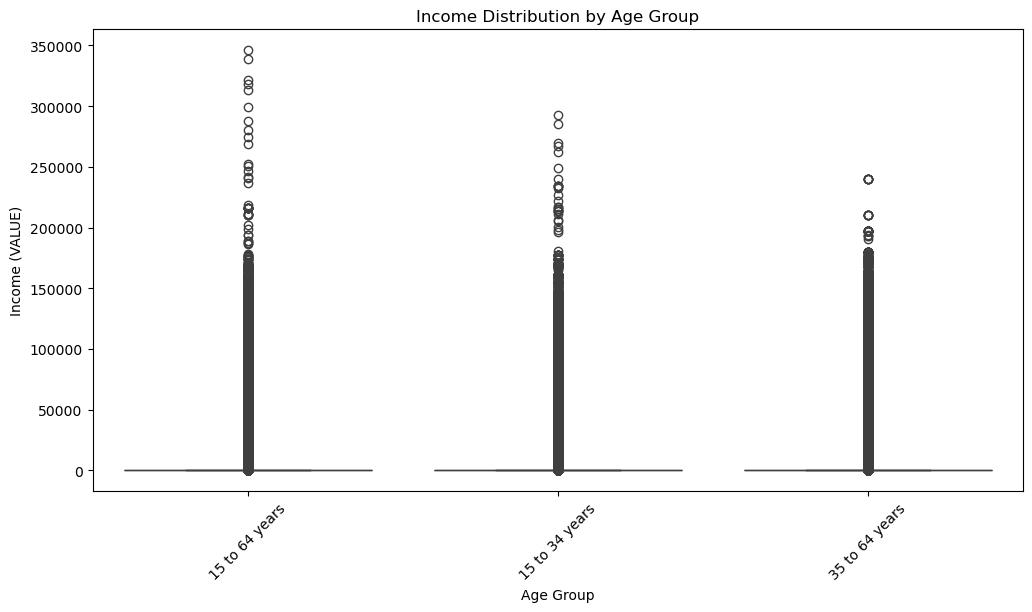

In [17]:
# Box plot for income by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dropped, x='Age group', y='VALUE')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income (VALUE)')
plt.xticks(rotation=45)
plt.show()


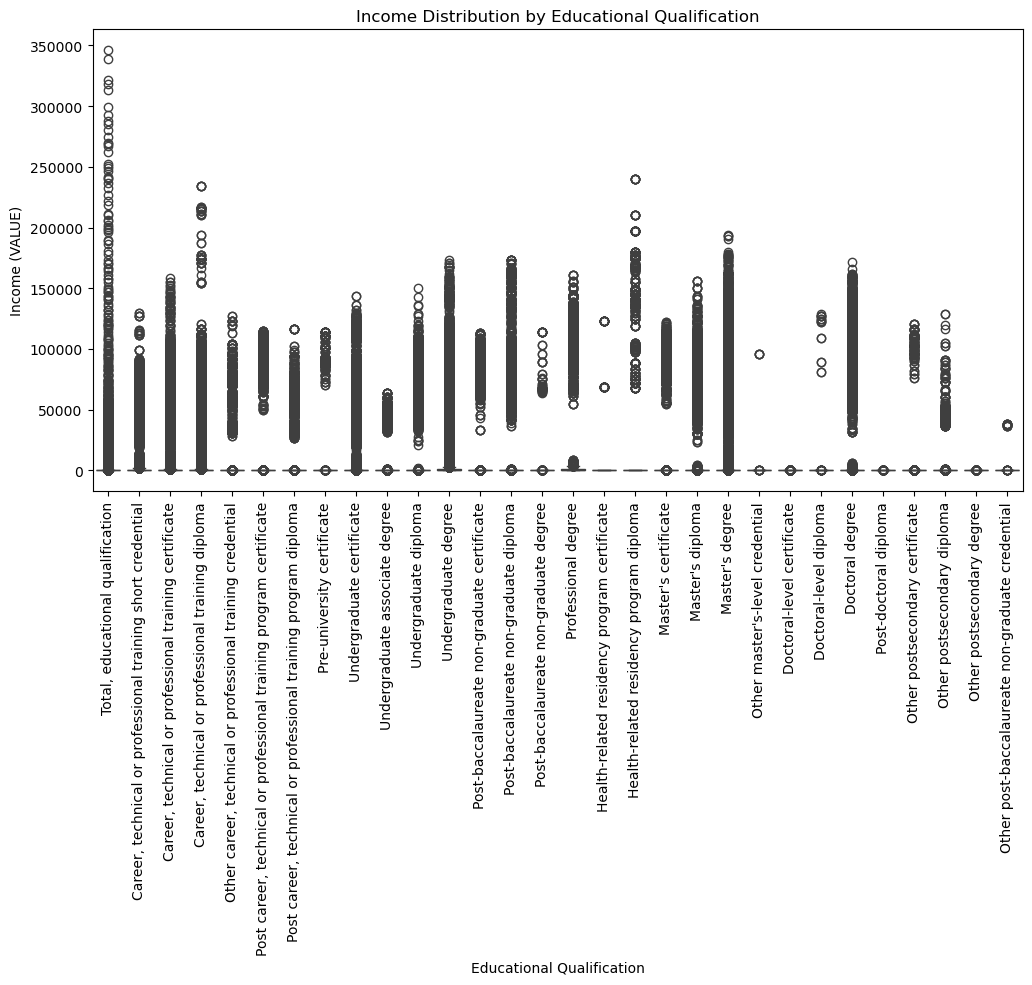

In [18]:
# Box plot for income by Educational Qualification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dropped, x='Educational qualification', y='VALUE')
plt.title('Income Distribution by Educational Qualification')
plt.xlabel('Educational Qualification')
plt.ylabel('Income (VALUE)')
plt.xticks(rotation=90)
plt.show()



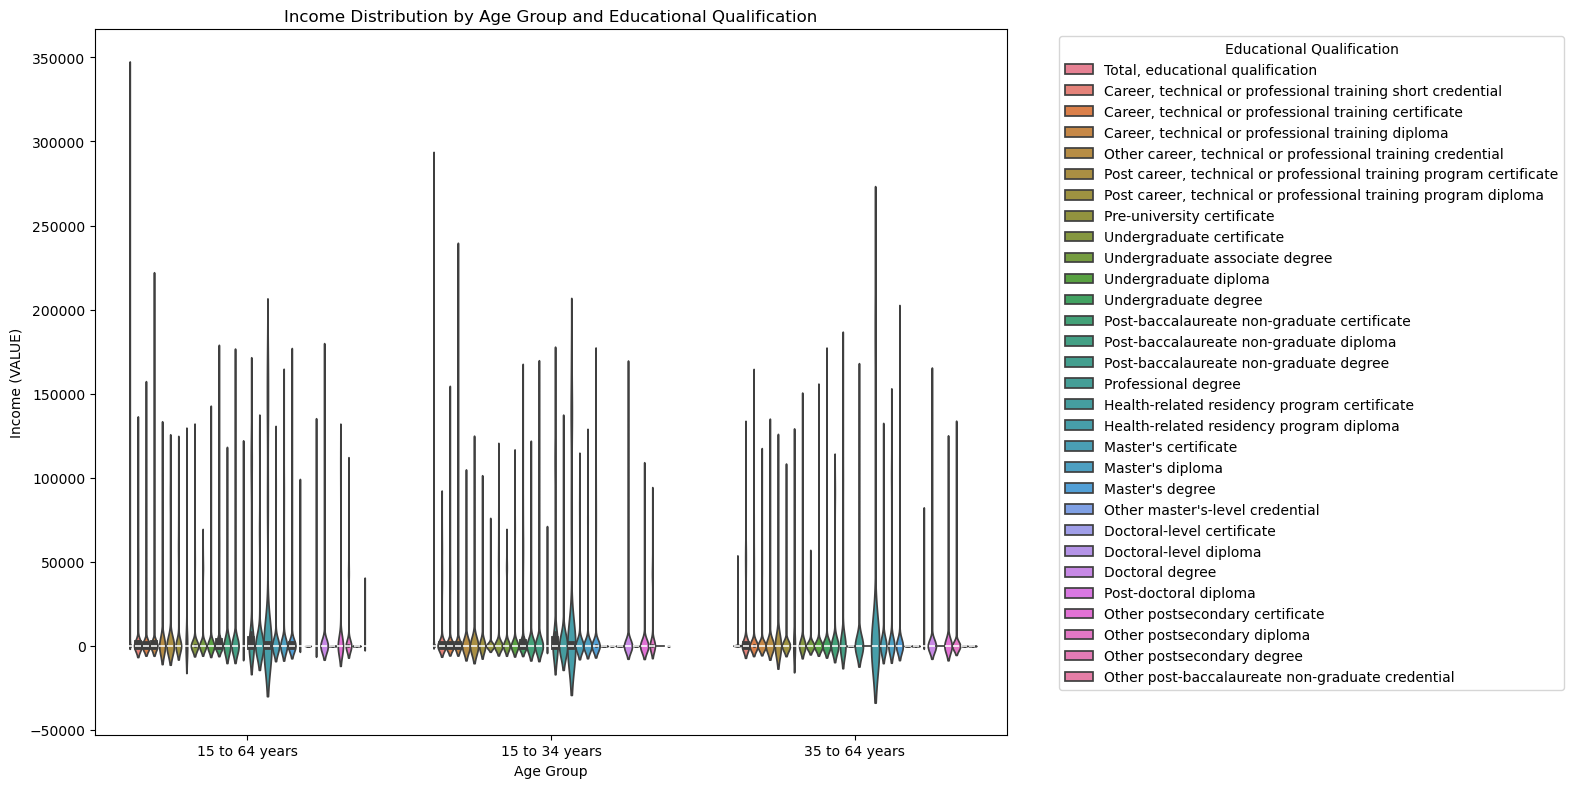

In [19]:
# Violin plot for income by age group and educational Qualification

plt.figure(figsize=(16, 8))
sns.violinplot(data=df_dropped, x='Age group', y='VALUE', hue='Educational qualification', dodge=True)
plt.title('Income Distribution by Age Group and Educational Qualification')
plt.xlabel('Age Group')
plt.ylabel('Income (VALUE)')
plt.legend(title='Educational Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


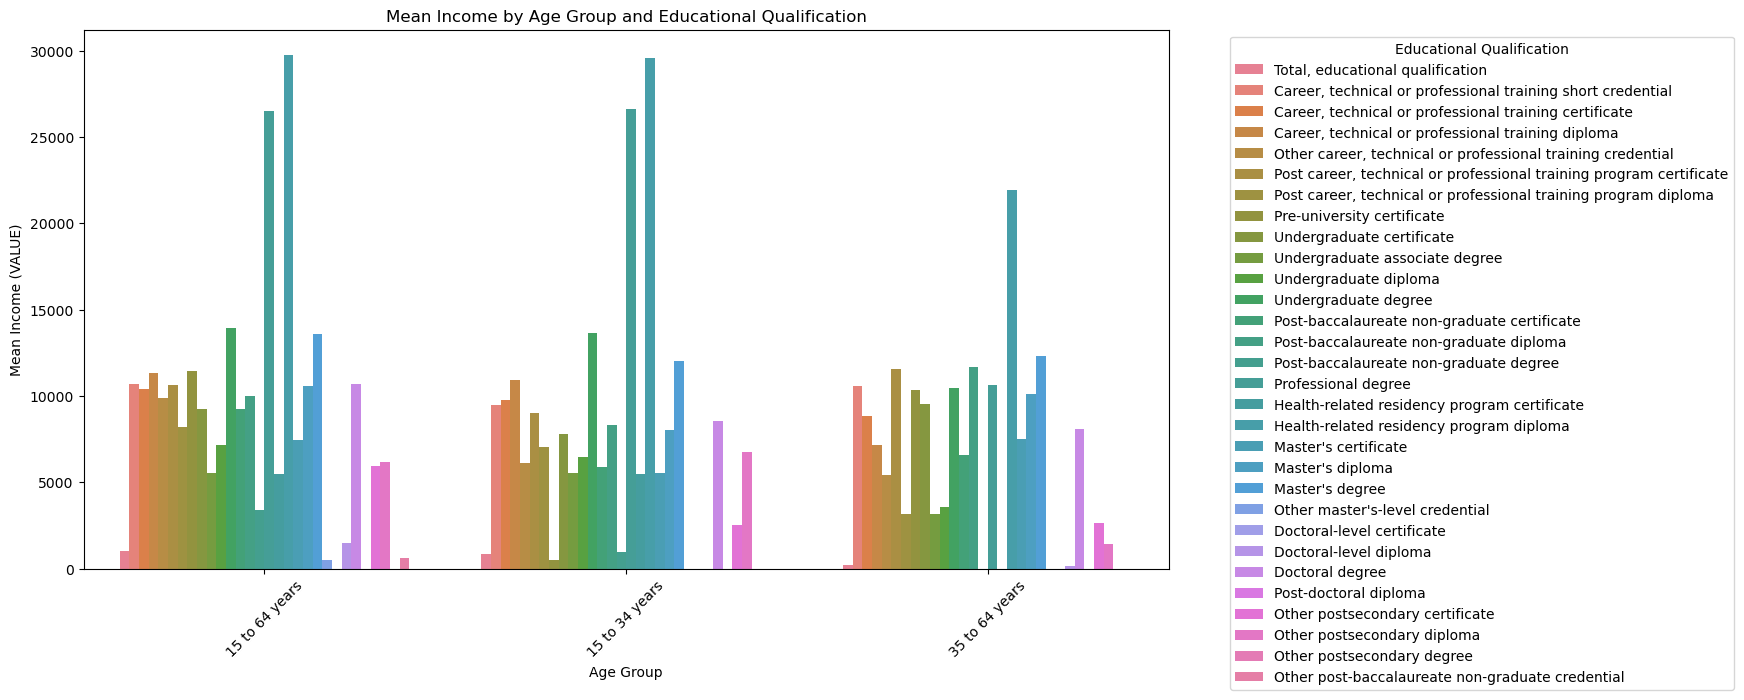

In [20]:
# Bar Plot of Mean Income by Age Group and Educational Qualification

plt.figure(figsize=(14, 7))
sns.barplot(data=df_dropped, x='Age group', y='VALUE', hue='Educational qualification', estimator=np.mean, errorbar=None)
plt.title('Mean Income by Age Group and Educational Qualification')
plt.xlabel('Age Group')
plt.ylabel('Mean Income (VALUE)')
plt.xticks(rotation=45)
plt.legend(title='Educational Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
# Shape of the dropped data
df_dropped.shape

(1048575, 12)

In [22]:
# Check for missing values in each column
missing_values = df_dropped.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Columns with missing values:
 VALUE    189718
dtype: int64


In [23]:
# Let us drop the missing data

# Drop rows with missing values in the 'VALUE' column
df_cleaned = df_dropped.dropna(subset=['VALUE'])

In [24]:
# Check for missing values after dropping
missing_values_after = df_cleaned.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
print("\nColumns with missing values after dropping:\n", missing_values_after)


Columns with missing values after dropping:
 Series([], dtype: int64)


In [25]:
# Display the shape of the dataset before and after
print("\nShape before dropping rows with missing 'VALUE':", df_dropped.shape)
print("Shape after dropping rows with missing 'VALUE':", df_cleaned.shape)


Shape before dropping rows with missing 'VALUE': (1048575, 12)
Shape after dropping rows with missing 'VALUE': (858857, 12)


In [26]:
# Confirming missing values have been dropped

missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Columns with missing values:
 Series([], dtype: int64)


##  Exploratory Data Analysis
Exploring the trends and demographic insights

In [27]:
df_cleaned.head(3)

,REF_DATE,GEO,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,UOM,UOM_ID,VALUE
0,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,Number,223,321590.0
1,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,Number,223,40400.0
2,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,Number,223,30620.0


### Graduation Trends

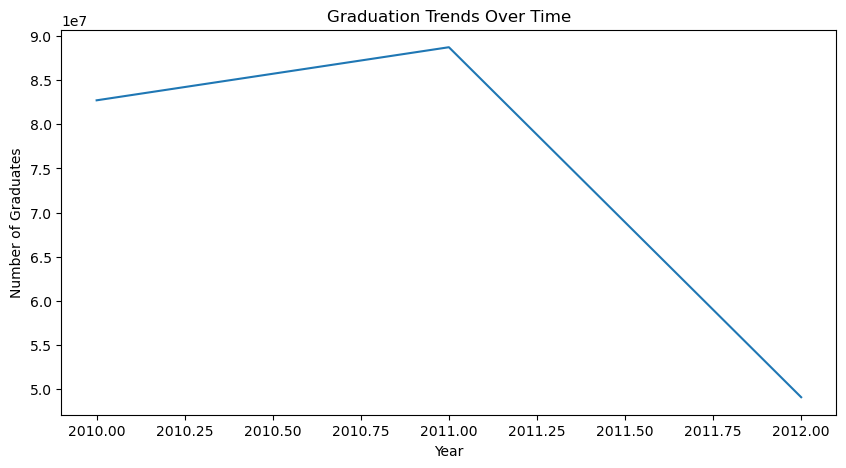

In [28]:
# Trend over time for all graduates
graduates_over_time = df_cleaned[df_cleaned['Graduate statistics'] == 'Number of graduates']
graduates_trend = graduates_over_time.groupby('REF_DATE')['VALUE'].sum()

plt.figure(figsize=(10, 5))
graduates_trend.plot()
plt.title('Graduation Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.show()


### Demographic Insights: Age and Gender Distribution

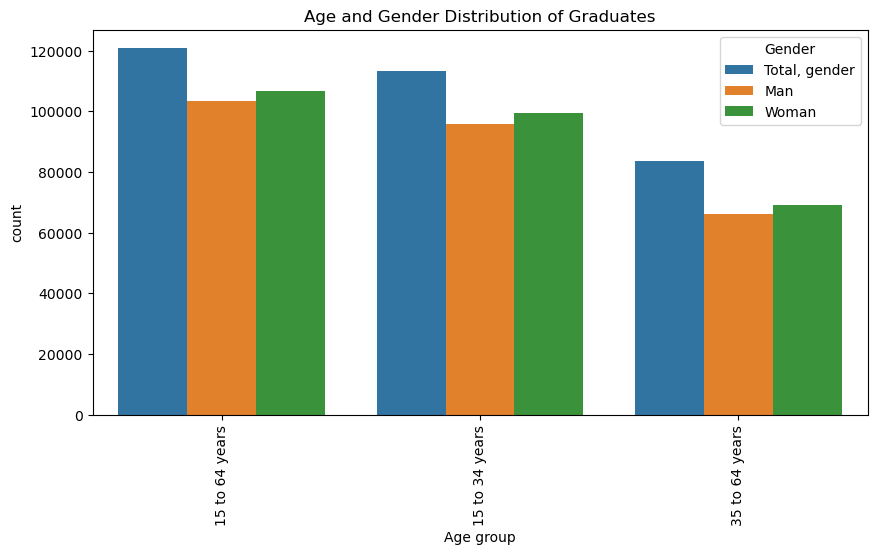

In [29]:
# Age group distribution of graduates
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='Age group', hue='Gender')
plt.title('Age and Gender Distribution of Graduates')
plt.xticks(rotation=90)
plt.show()


### Educational Qualification and Field of Study Distribution

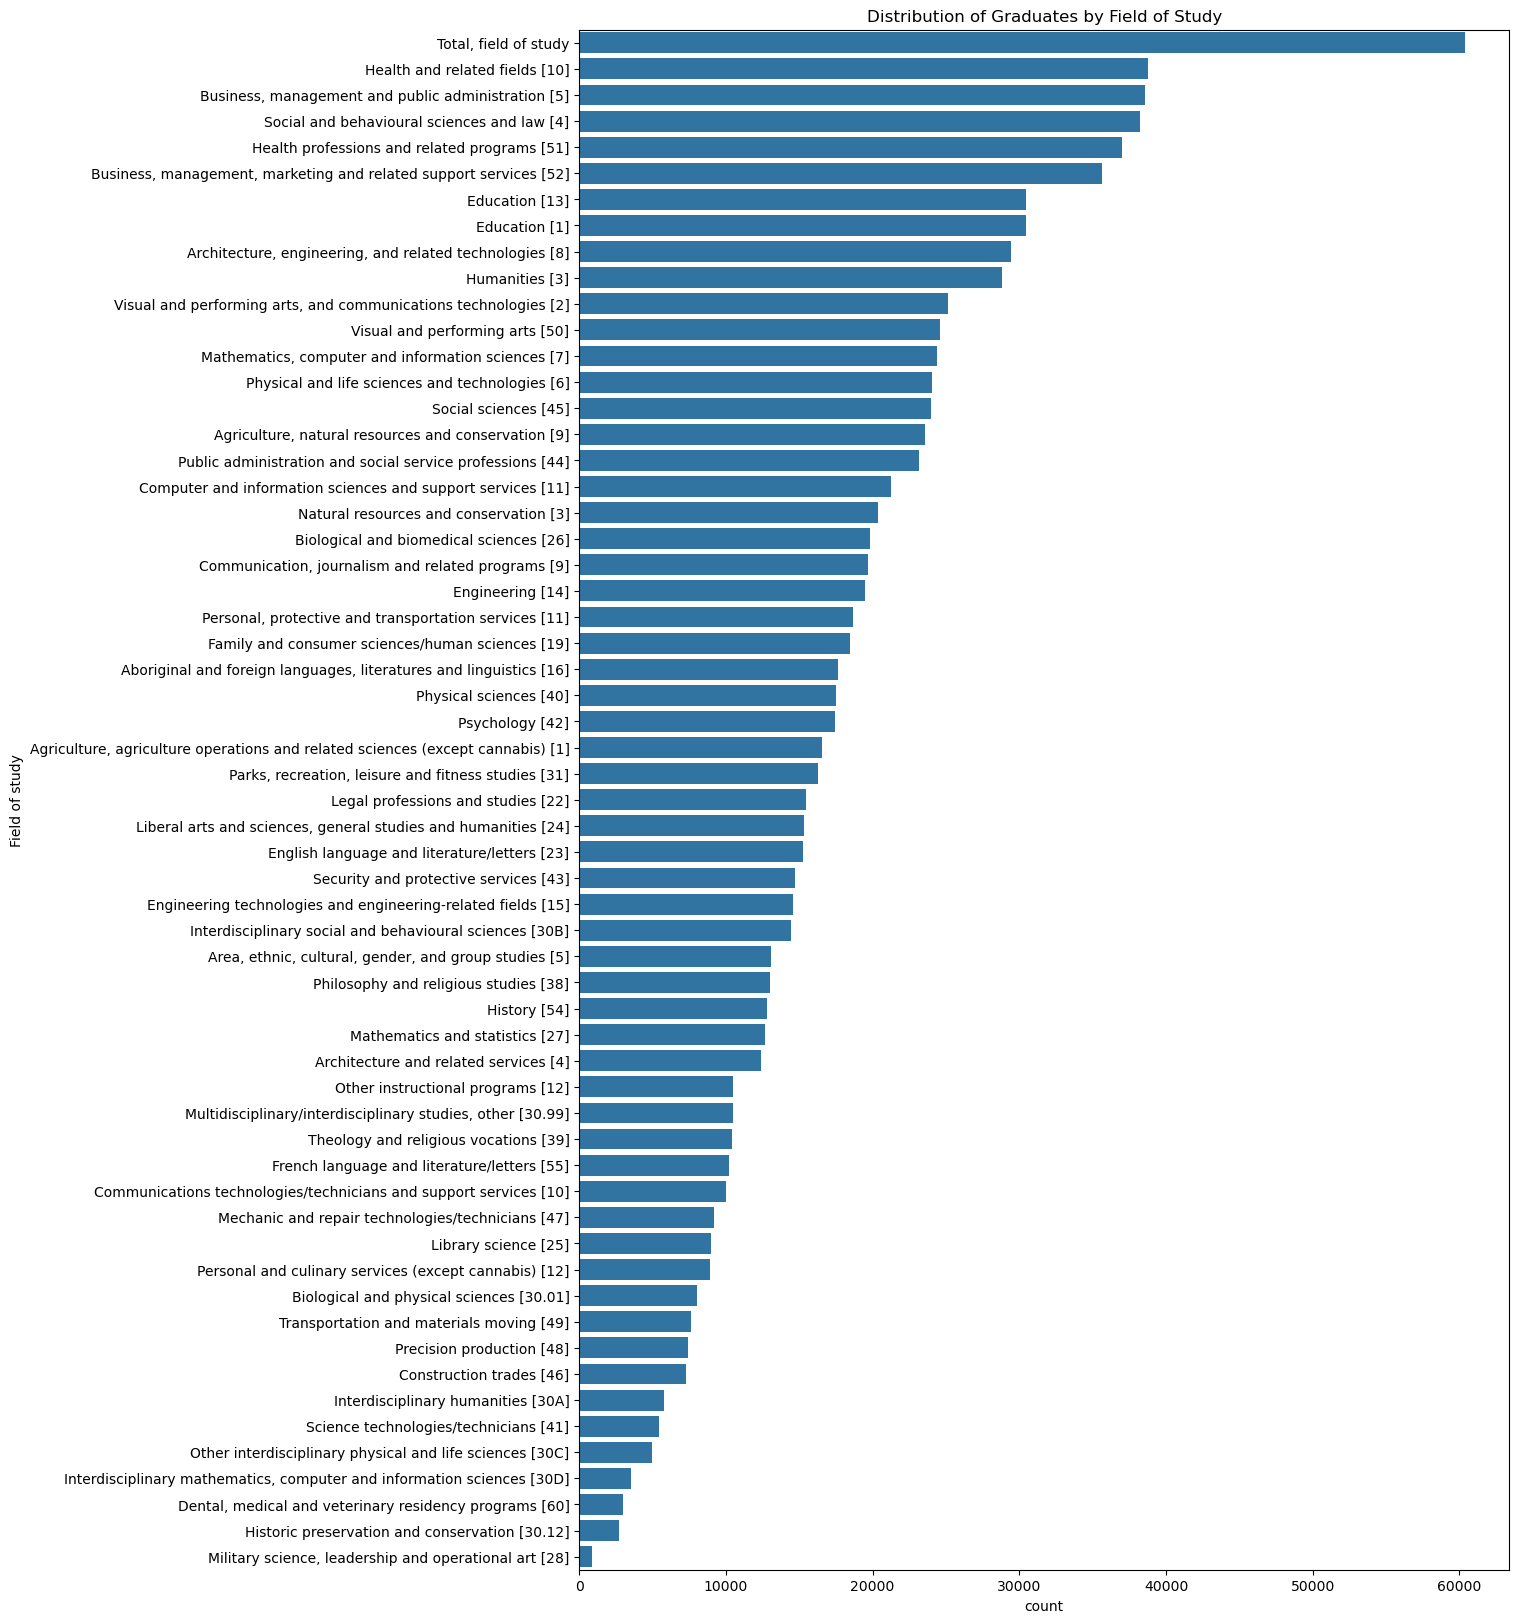

In [30]:
# Field of Study distribution
plt.figure(figsize=(12, 20))
sns.countplot(data=df, y='Field of study', order=df['Field of study'].value_counts().index)
plt.title('Distribution of Graduates by Field of Study')
plt.show()


### Frequency Analysis

Educational qualification
Total, educational qualification                                       148741
Undergraduate degree                                                   138641
Master's degree                                                        114090
Career, technical or professional training diploma                      80604
Doctoral degree                                                         64865
Career, technical or professional training certificate                  62172
Undergraduate certificate                                               48262
Career, technical or professional training short credential             30123
Master's diploma                                                        28727
Undergraduate diploma                                                   28465
Post-baccalaureate non-graduate diploma                                 16049
Professional degree                                                     14239
Master's certificate                  

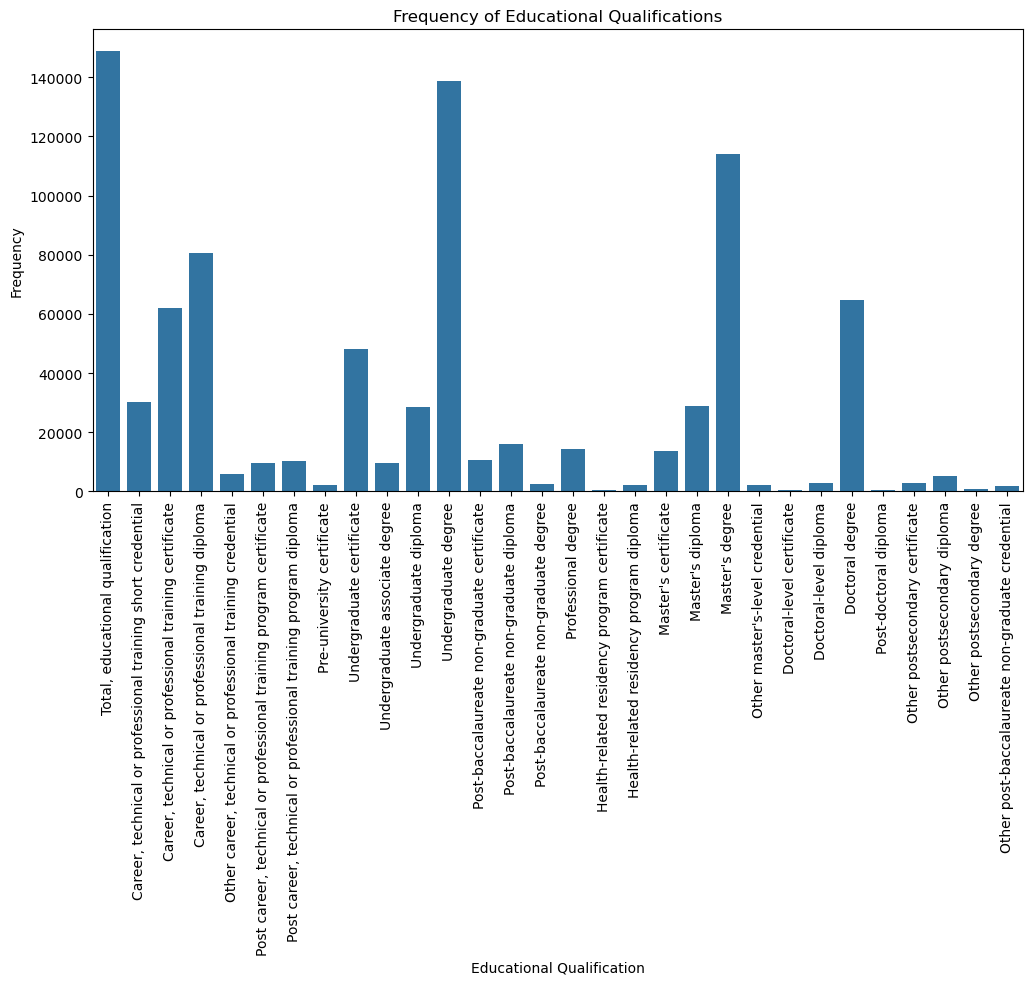

In [31]:
# Frequency table for a categorical column
print(df_cleaned['Educational qualification'].value_counts())

# Adjust the size of the chart
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Bar plot
sns.countplot(data=df_cleaned, x='Educational qualification')

# Add titles and rotate x-axis labels
plt.title('Frequency of Educational Qualifications')
plt.xticks(rotation=90)
plt.xlabel('Educational Qualification')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Cross-tabulations and Heatmaps

In [32]:
# Cross-tabulation to compute frequencies of Gender and Educational qualification
crosstab = pd.crosstab(df_cleaned['Gender'], df_cleaned['Educational qualification'])
crosstab



Educational qualification,"Career, technical or professional training certificate","Career, technical or professional training diploma","Career, technical or professional training short credential",Doctoral degree,Doctoral-level certificate,Doctoral-level diploma,Health-related residency program certificate,Health-related residency program diploma,Master's certificate,Master's degree,...,Post-baccalaureate non-graduate degree,Post-baccalaureate non-graduate diploma,Post-doctoral diploma,Pre-university certificate,Professional degree,"Total, educational qualification",Undergraduate associate degree,Undergraduate certificate,Undergraduate degree,Undergraduate diploma
Gender,,,,,,,,,,,,,,,,,,,,,
Man,19169,25156,9653,20712,0,743,150,663,3802,35719,...,722,4464,84,648,4510,48410,2872,14086,43522,8433
"Total, gender",23371,29809,11172,24755,264,1195,258,768,5414,41742,...,958,6282,168,832,5048,52274,3767,18325,49911,11104
Woman,19632,25639,9298,19398,264,960,204,708,4379,36629,...,782,5303,108,706,4681,48057,3090,15851,45208,8928


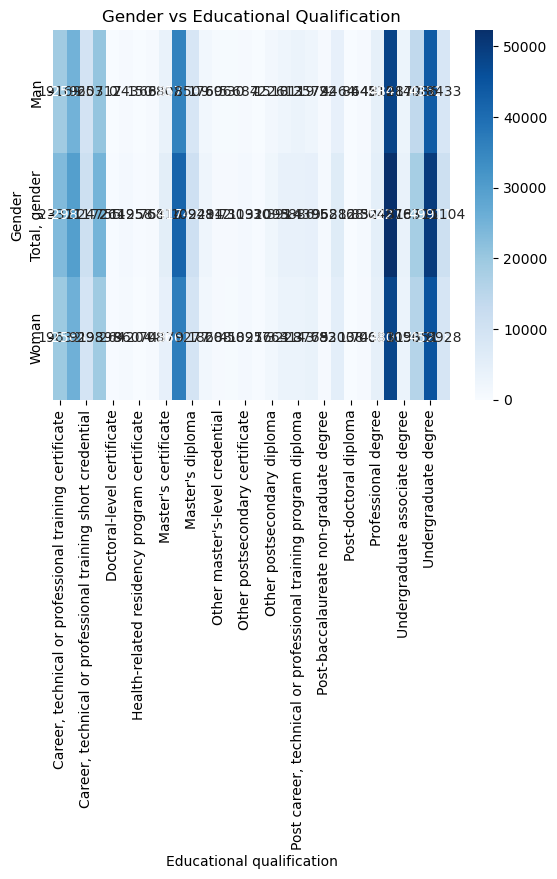

In [33]:
# Heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Gender vs Educational Qualification')
plt.show()

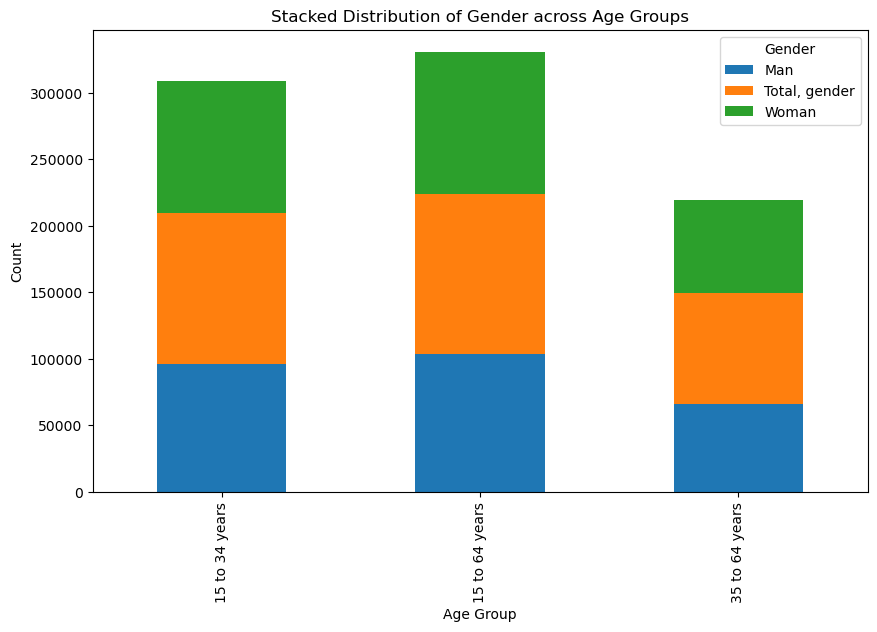

In [34]:
grouped_data = df_cleaned.groupby(['Age group', 'Gender']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Distribution of Gender across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_109448/2069065329.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='Age group', y='VALUE', ci=None)


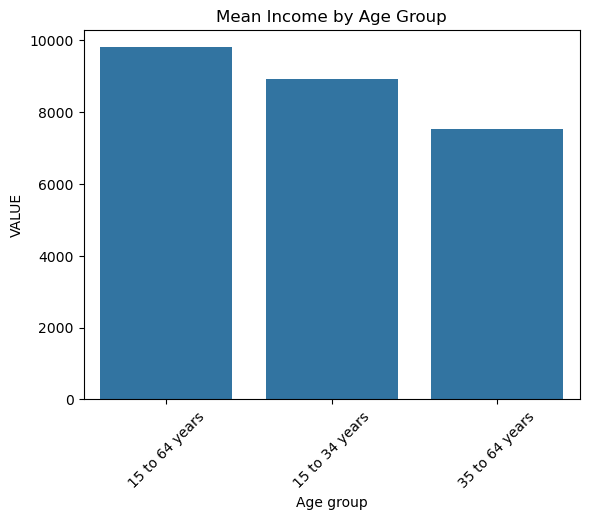

In [35]:
# Mean income by Age Group
sns.barplot(data=df_cleaned, x='Age group', y='VALUE', ci=None)
plt.title('Mean Income by Age Group')
plt.xticks(rotation=45)
plt.show()


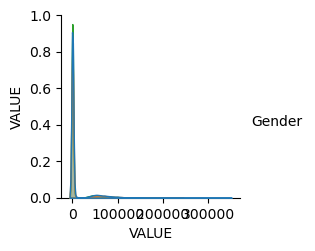

In [36]:
sns.pairplot(df_cleaned, hue='Gender', vars=['VALUE'], kind='scatter', diag_kind='kde')
plt.show()


In [37]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_cleaned['Gender'], df_cleaned['Educational qualification'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi-Square Test
Chi2 Statistic: 1770.7804859576306, p-value: 0.0


### Word Clouds for Field of Study

In [40]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 486.7 kB/s eta 0:00:00m eta 0:00:010:01:01


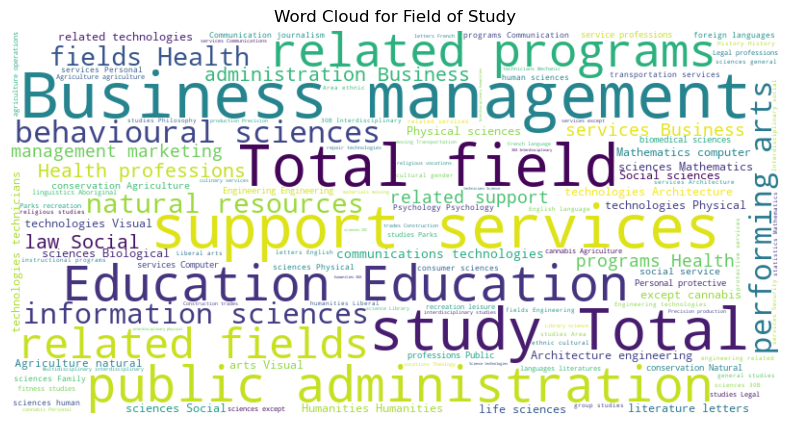

In [41]:
from wordcloud import WordCloud

text = " ".join(df_cleaned['Field of study'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Field of Study")
plt.show()


### Frequency table for 'Status of student in Canada'

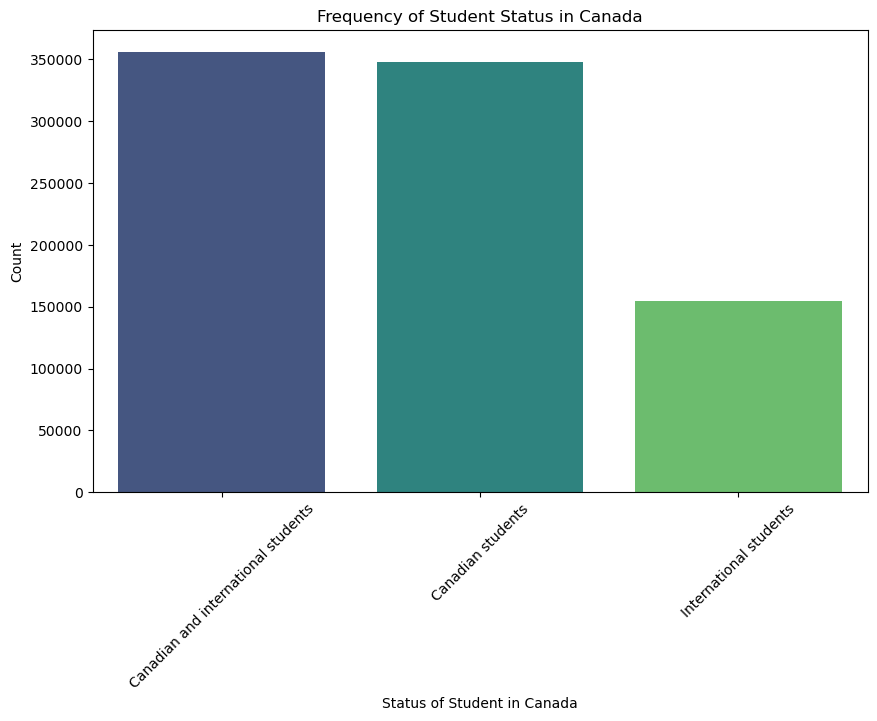

In [43]:
# Frequency table for 'Status of student in Canada'
status_counts = df_cleaned['Status of student in Canada'].value_counts()
status_counts

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, 
            y=status_counts.values, 
            hue=status_counts.index,  # Add this line
            palette='viridis',
            legend=False)  # Add this to prevent duplicate legend

plt.title('Frequency of Student Status in Canada')
plt.xlabel('Status of Student in Canada')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


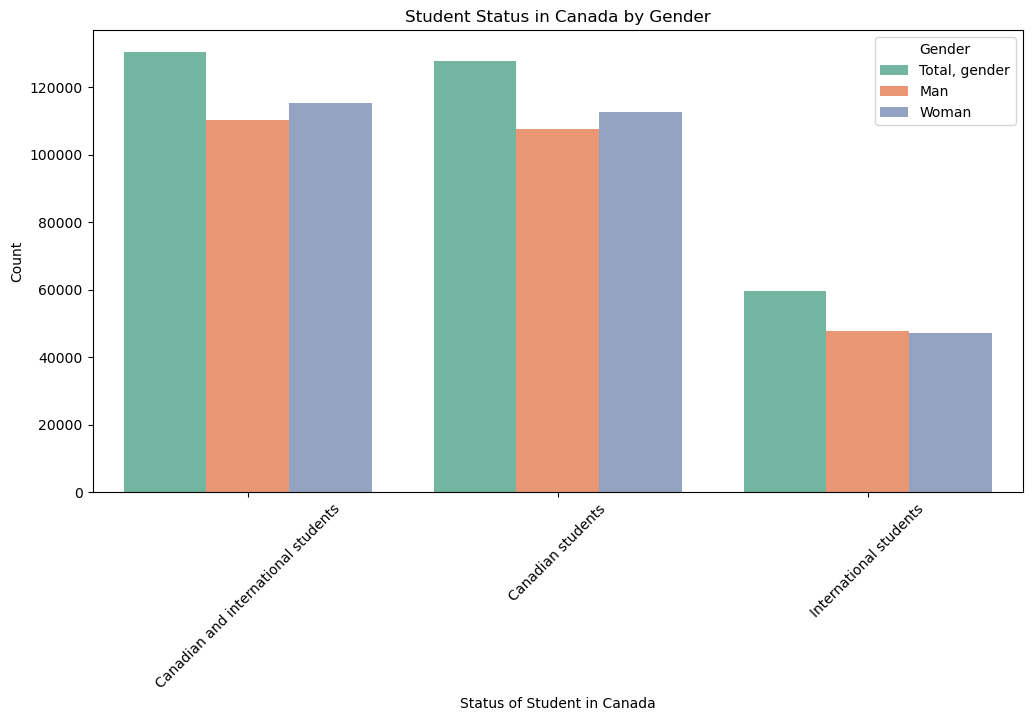

In [44]:
# Visualize student status distribution across genders.
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Status of student in Canada', hue='Gender', palette='Set2')

plt.title('Student Status in Canada by Gender')
plt.xlabel('Status of Student in Canada')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


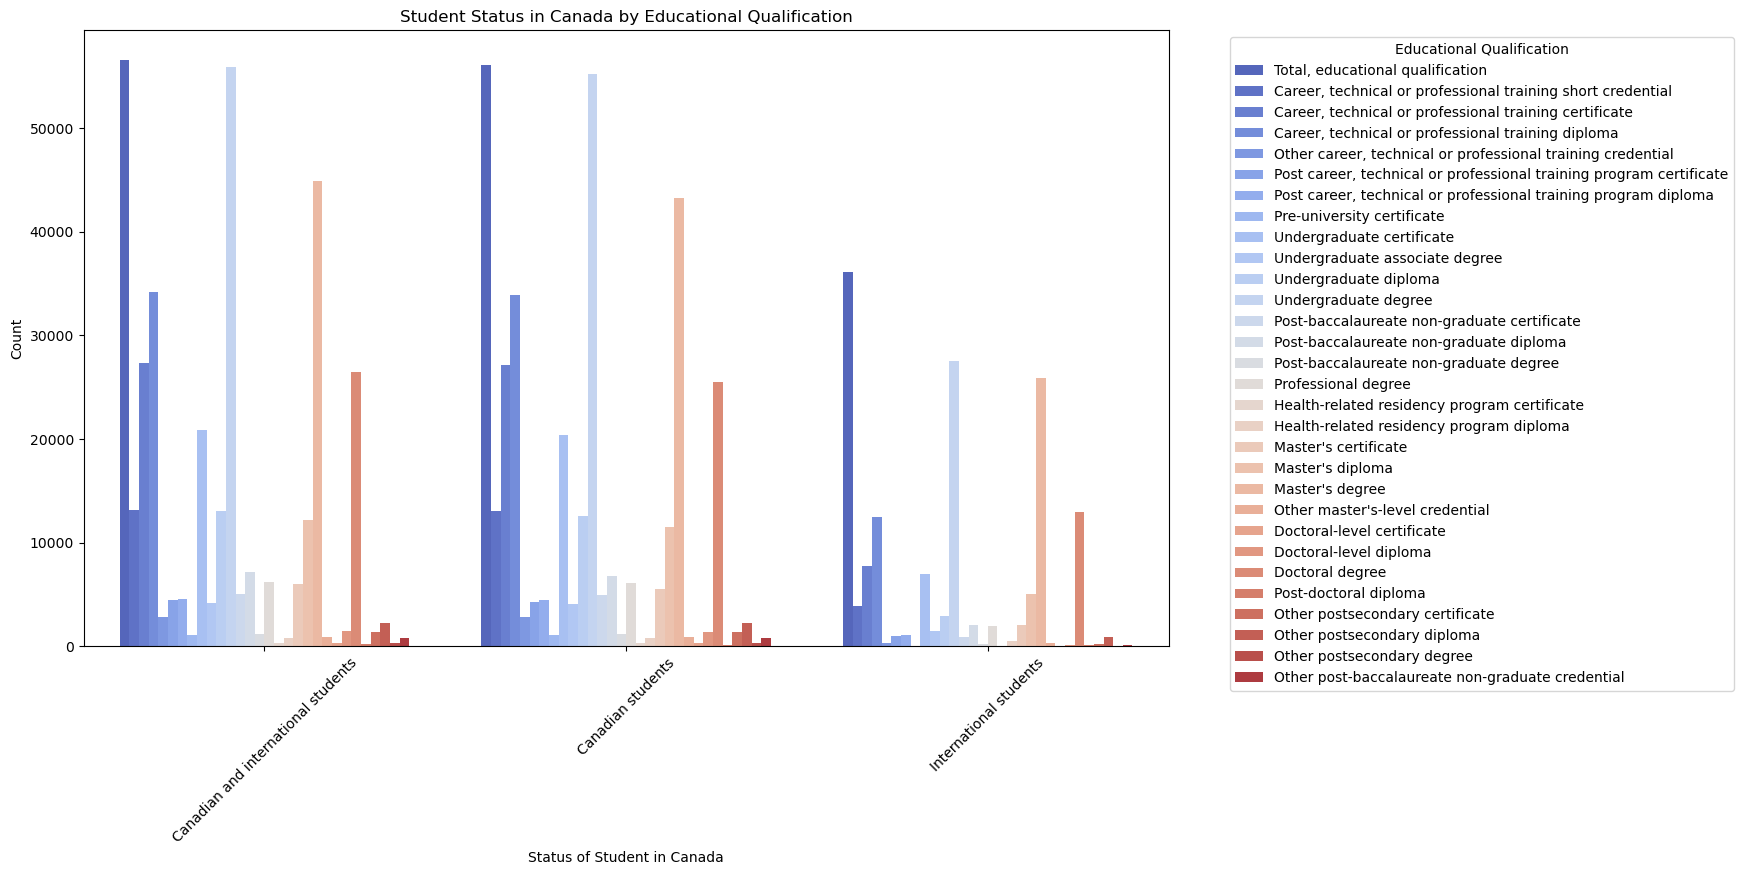

In [45]:
# Relationship with Educational Qualification
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, x='Status of student in Canada', hue='Educational qualification', palette='coolwarm')

plt.title('Student Status in Canada by Educational Qualification')
plt.xlabel('Status of Student in Canada')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Educational Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_109448/1347720318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Status of student in Canada', y='VALUE', palette='mako')


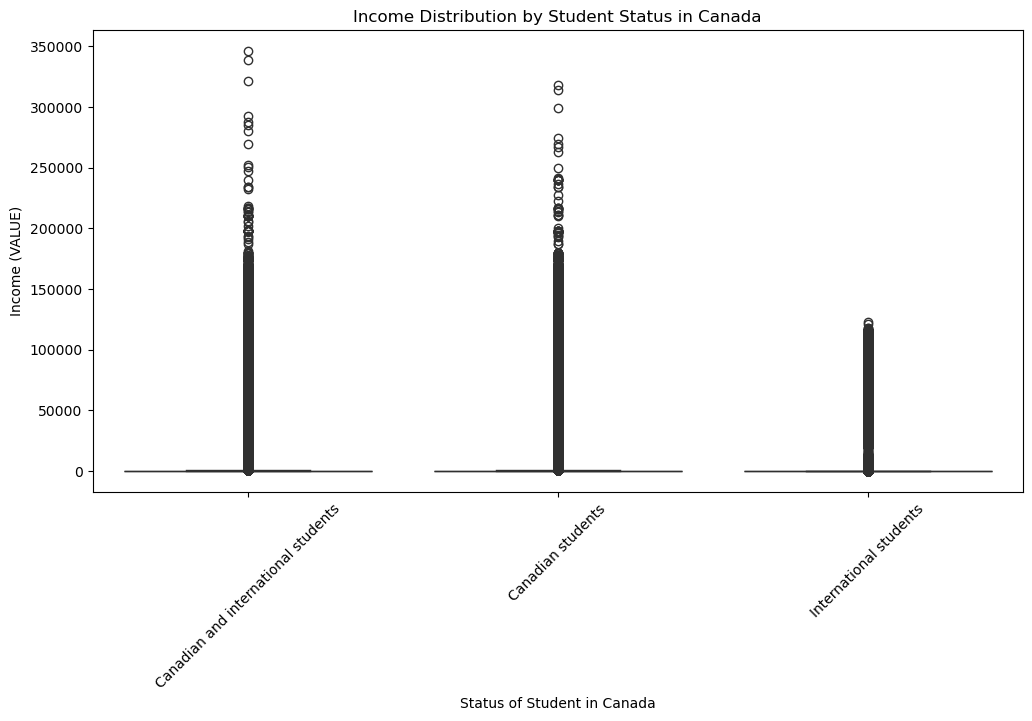

In [46]:
# Relationship with (VALUE)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Status of student in Canada', y='VALUE', palette='mako')

plt.title('Income Distribution by Student Status in Canada')
plt.xlabel('Status of Student in Canada')
plt.ylabel('Income (VALUE)')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

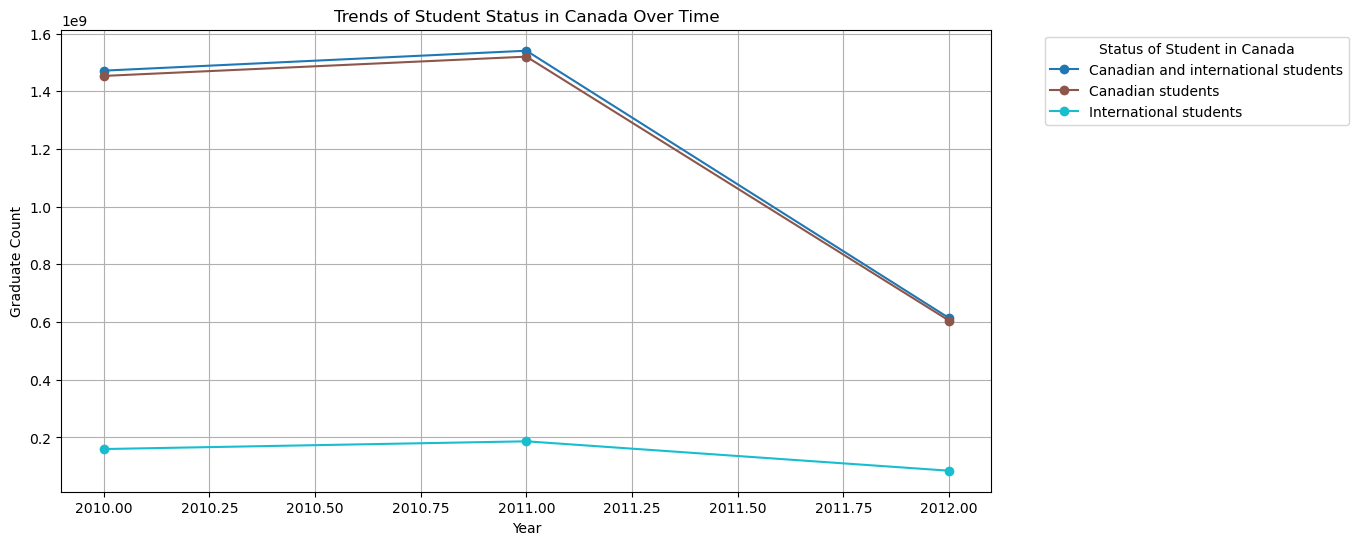

In [47]:
# Trend Over Time
status_trends = df_cleaned.groupby(['REF_DATE', 'Status of student in Canada'])['VALUE'].sum().unstack()

# Line plot
plt.figure(figsize=(12, 6))
status_trends.plot(kind='line', marker='o', figsize=(12, 6), cmap='tab10')

plt.title('Trends of Student Status in Canada Over Time')
plt.xlabel('Year')
plt.ylabel('Graduate Count')
plt.legend(title='Status of Student in Canada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


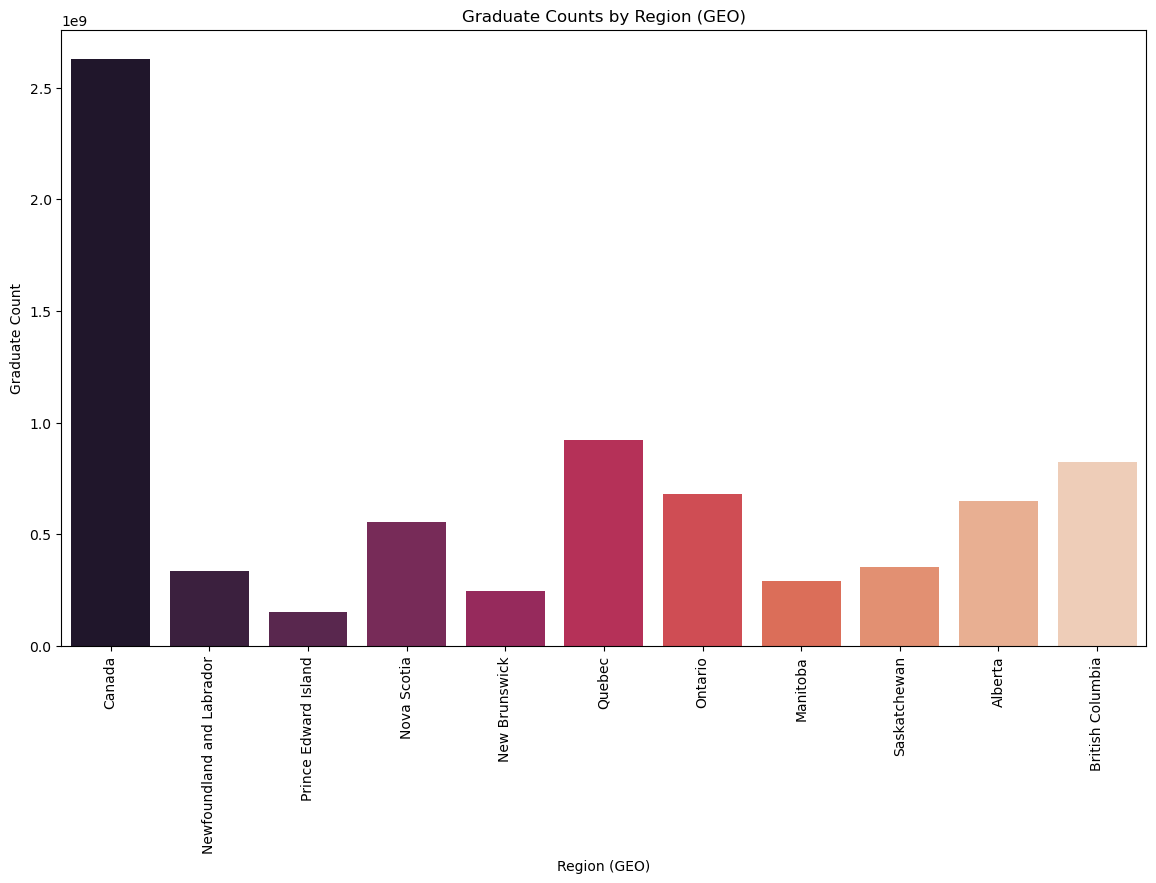

In [50]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned, 
            x='GEO',
            y='VALUE', 
            hue='GEO',  # Add hue parameter
            estimator=sum, 
            errorbar=None,
            palette='rocket',
            legend=False)  # Add legend=False

plt.title('Graduate Counts by Region (GEO)')
plt.xlabel('Region (GEO)')
plt.ylabel('Graduate Count')
plt.xticks(rotation=90)
plt.show()


### Modeling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare dataset for modeling
# Only keep records with known income information
income_data = df_cleaned[df_cleaned['Graduate statistics'] == 'Income'].dropna(subset=['VALUE'])

# Select features and target
X = income_data[['REF_DATE', 'Educational qualification', 'Field of study', 'Gender', 'Age group']]
y = income_data['VALUE']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

### Evaluation

In [ ]:
# Display feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top Features Influencing Income Levels Post-Graduation")
plt.show()


### Deployment

import plotly.express as px

# Plotly for interactive trends over time
fig = px.line(graduates_trend, title="Interactive Graduation Trends Over Time")
fig.show()
